In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import pandas as pd
from scipy.spatial import distance
from scipy.sparse.linalg import eigs

## Diffusion Map Algorithm 

In [2]:
# parameters: data matrix X, scalar k
# returns: lamda, phi
def kernelnormalize(X, k):
    D = distance.cdist(X, X, 'euclidean') # Form a distance matrix D
    N = max(D.shape[0], D.shape[1])
    # initialize matrices
    P = np.zeros([N, N])
    Q = np.zeros([N, N])
    W = np.zeros([D.shape[0], D.shape[1]])
    epsilon = 0.05 * D.max() # the diameter of the dataset
    
    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            kern = -((D[i][j])**2/epsilon) # kernel
            W[i][j] = np.exp(kern) # Form the kernel matrix
            
    # Form the diagonal normalization matrix
    s = np.sum(W, axis=1)
    for i in range(N):
        P[i][i] = s[i]
        
    # Normalize W to form the kernel matrix
    P_inv = np.linalg.inv(P)
    K = P_inv.dot(W).dot(P_inv)
    q = np.sum(K, axis=1)
    
    # Form the diagonal normalization matrix
    for i in range(N):
        Q[i][i] = q[i]
            
    # Form the symmetric matrix
    Q_inv = np.linalg.inv(Q)
    Q_sqrt = np.sqrt(Q_inv)
    T_hat = Q_sqrt.dot(K).dot(Q_sqrt)
    
    vals, vecs = eigs(T_hat, k, which='LR')
    
    eps_pow = 1/epsilon
    
    lamda_sq = np.power(vals, eps_pow)
    lamda = np.sqrt(lamda_sq)
    
    phi = Q_sqrt.dot(vecs)
        
    return lamda, phi

## Question 2 Task 1

In [18]:
N = 1000
pi = np.pi
tk_matrix = np.zeros([1000, 1])
xk = np.zeros([1000, 2])
for k in range(N):
    tk = (2 * pi * k) / (N+1)
    tk_matrix[k] = tk
    xk[k][0] = np.cos(tk)
    xk[k][1] = np.sin(tk)

tk vs. cos(tk) and tk vs. sin(tk) Graph

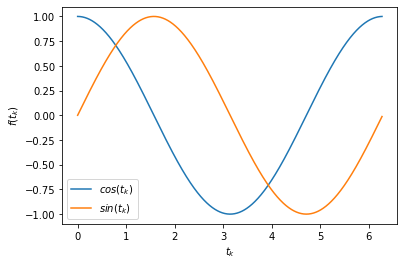

In [19]:
plt.plot(tk_matrix, xk[:,0])
plt.plot(tk_matrix, xk[:,1])
plt.legend(['$cos(t_k)$', '$sin(t_k)$'])
plt.ylabel('$f(t_k)$')
plt.xlabel('$t_k$')
plt.show()

Generated Data

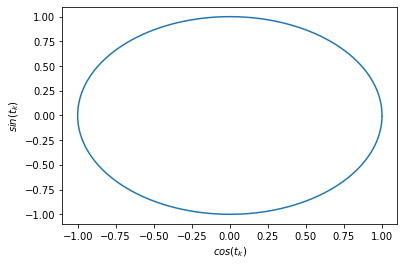

In [20]:
plt.plot(xk[:,0], xk[:,1])
plt.ylabel('$sin(t_k)$')
plt.xlabel('$cos(t_k)$')
plt.show()

Diffusion Map Algorithm and Eigenfunctions

In [21]:
lamda_f, phi_f = kernelnormalize(xk, 6)

In [22]:
lamda_f

array([1.        +0.j, 0.87965296+0.j, 0.87956515+0.j, 0.59850672+0.j,
       0.59919324+0.j, 0.31647998+0.j])

In [23]:
phi_f[0]

array([-0.29963425+0.j,  0.00269165+0.j,  0.42343157+0.j, -0.42310667+0.j,
       -0.00538575+0.j,  0.00806744+0.j])

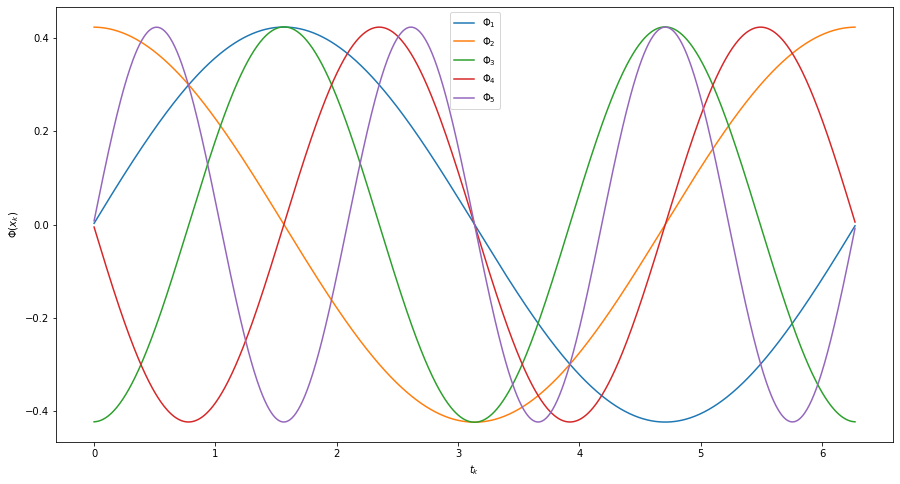

In [24]:
plt.figure(figsize=(15, 8))
plt.plot(tk_matrix, phi_f[:, 1:6].real)
#plt.scatter(tk_matrix, phi_f[:,0])
plt.ylabel('$\u03A6(x_k)$')
plt.xlabel('$t_k$')
plt.legend(['$\u03A6_1$', '$\u03A6_2$', '$\u03A6_3$', '$\u03A6_4$', '$\u03A6_5$'])
plt.show()

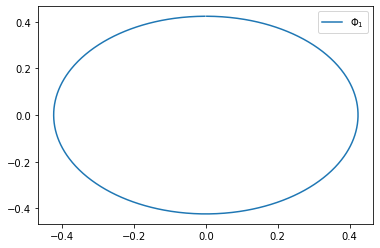

In [25]:
plt.plot(phi_f[:,1].real, phi_f[:, 2].real)
plt.legend(['$\u03A6_1$', '$\u03A6_2$', '$\u03A6_3$', '$\u03A6_4$', '$\u03A6_5$'])
plt.show()

## Question 2 Task 2

Swiss Roll Dataset Diffusion Map calculation.

In [17]:
from scipy.spatial import distance
from scipy.sparse.linalg import eigs
from scipy.linalg import fractional_matrix_power
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [60]:
N = 5000
X = datasets.make_swiss_roll(n_samples = 5000) 

Text(0.5, 0.92, 'Swiss Roll Data')

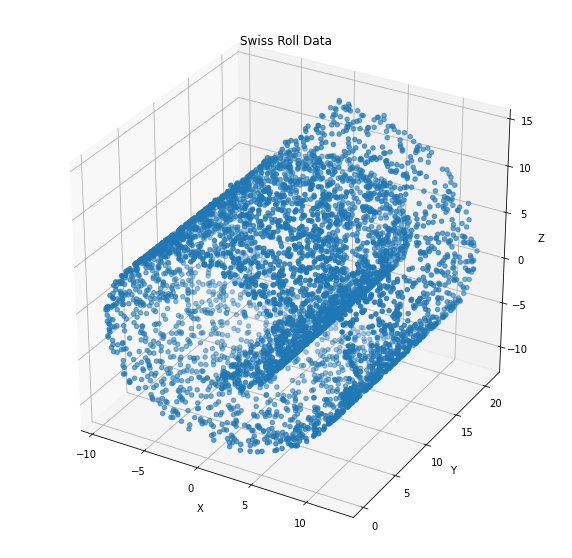

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0][:,0], X[0][:,1], X[0][:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Swiss Roll Data')
#ax.view_init(azim= 90, elev=0)

In [62]:
eigenvalues, eigenfunctions = kernelnormalize(X[0], 11)

In [63]:
eigenvalues

array([1.        +0.j, 0.99985933+0.j, 0.99945035+0.j, 0.99876863+0.j,
       0.99779456+0.j, 0.99762556+0.j, 0.9974497 +0.j, 0.99708138+0.j,
       0.9965708 +0.j, 0.9963585 +0.j, 0.99537039+0.j])

In [64]:
eigenfunctions.shape

(5000, 11)

Pairwise Eigenfunction graphs.

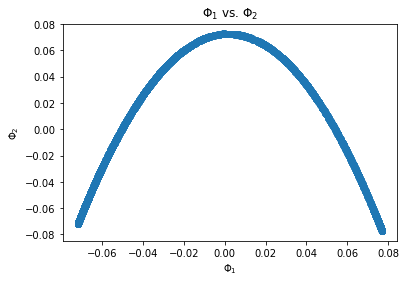

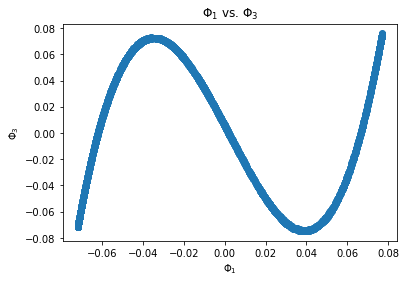

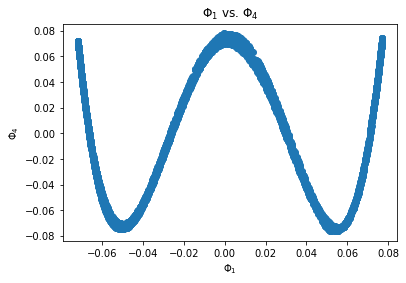

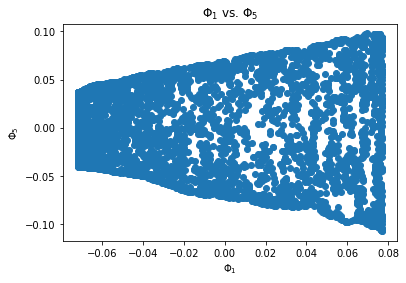

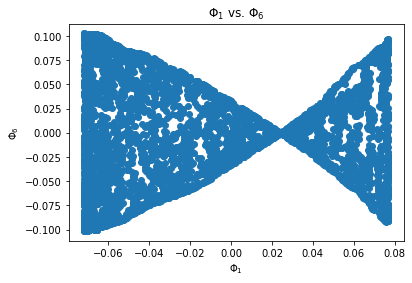

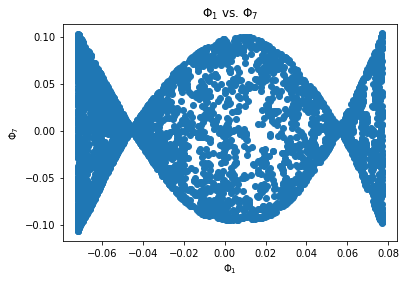

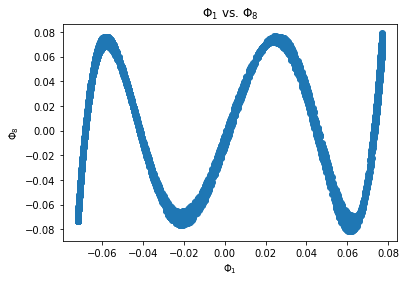

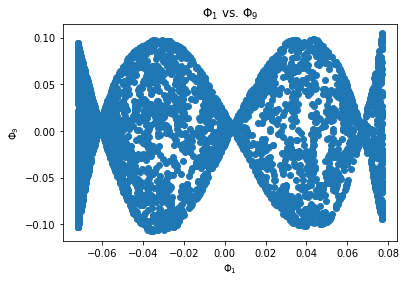

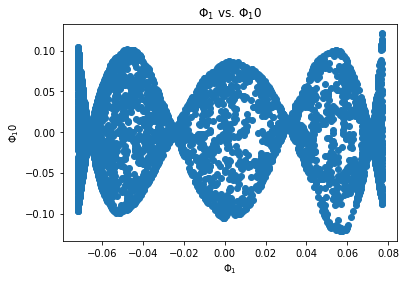

In [65]:
for i in range(2,11):
    plt.scatter(eigenfunctions[:,1].real, eigenfunctions[:,i].real)
    plt.xlabel('$\u03A6_'+str(1)+'$')
    plt.ylabel('$\u03A6_'+str(i)+'$')
    plt.title('$\u03A6_'+str(1)+'$ vs. $\u03A6_'+str(i)+'$')
    plt.show()

Three Principal Components of Dataset.

Text(0.5, 0.92, 'Three Principal Components of Swiss Roll Dataset')

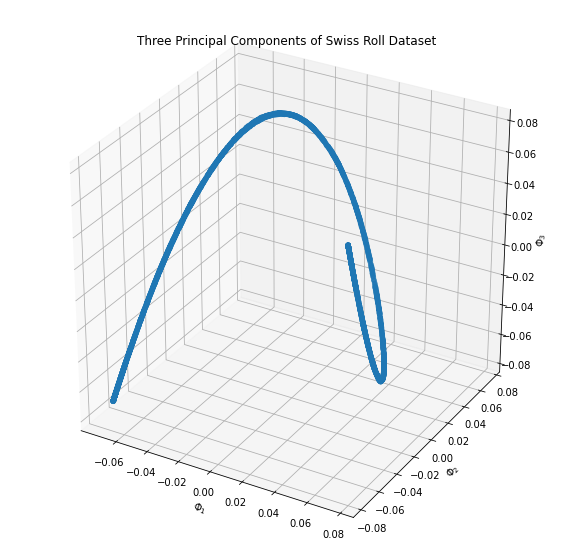

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenfunctions[:,1].real, eigenfunctions[:,2].real,eigenfunctions[:,3].real)
ax.set_xlabel('$\u03A6_'+str(1)+'$')
ax.set_ylabel('$\u03A6_'+str(2)+'$')
ax.set_zlabel('$\u03A6_'+str(3)+'$')
ax.set_title('Three Principal Components of Swiss Roll Dataset')
#ax.view_init(azim= 90, elev=30)

Same Calculations, by 1000 data.

In [18]:
N_2 = 1000
X_2 = datasets.make_swiss_roll(n_samples = N_2) 

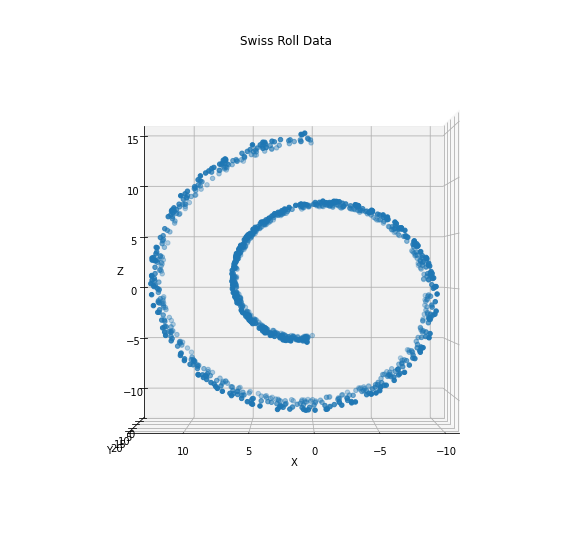

In [19]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_2[0][:,0], X_2[0][:,1], X_2[0][:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Swiss Roll Data')
ax.view_init(azim= 90, elev=0)

In [20]:
eigenvalues_1000, eigenfunctions_1000 = kernelnormalize(X_2[0], 11)

In [21]:
eigenvalues_1000

array([1.        +0.j, 0.99993046+0.j, 0.99973766+0.j, 0.99963085+0.j,
       0.99932561+0.j, 0.99915475+0.j, 0.99894422+0.j, 0.99875944+0.j,
       0.99849153+0.j, 0.99839338+0.j, 0.99813857+0.j])

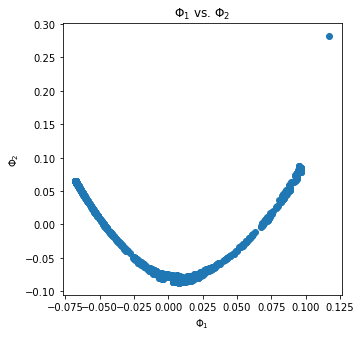

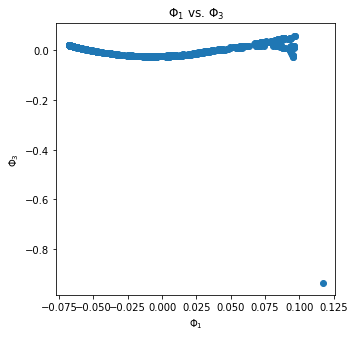

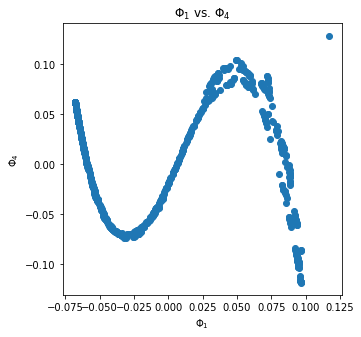

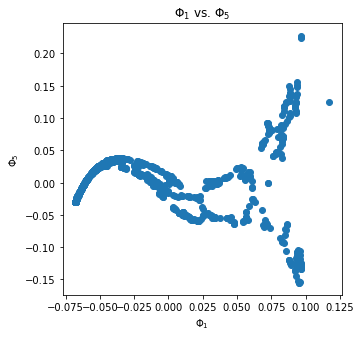

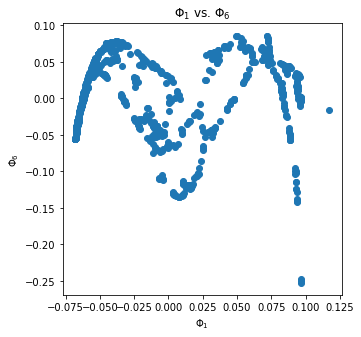

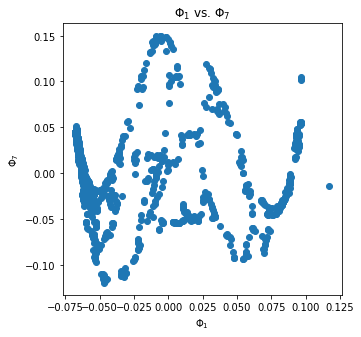

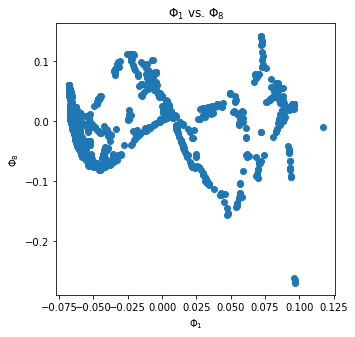

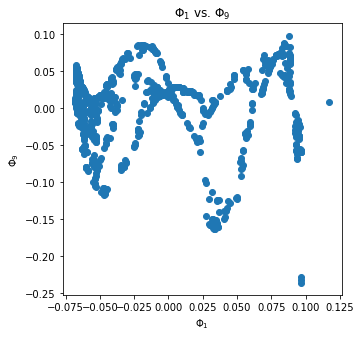

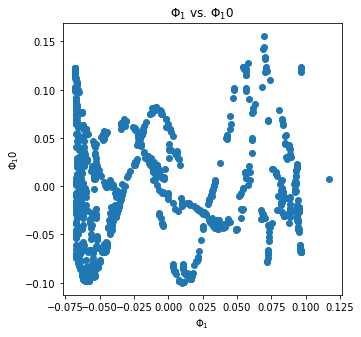

In [22]:
for i in range(2,11):
    fig = plt.figure(figsize = (5,5))
    plt.scatter(eigenfunctions_1000.real[:,1], eigenfunctions_1000.real[:,i])
    plt.xlabel('$\u03A6_'+str(1)+'$')
    plt.ylabel('$\u03A6_'+str(i)+'$')
    plt.title('$\u03A6_'+str(1)+'$ vs. $\u03A6_'+str(i)+'$')
    plt.show()

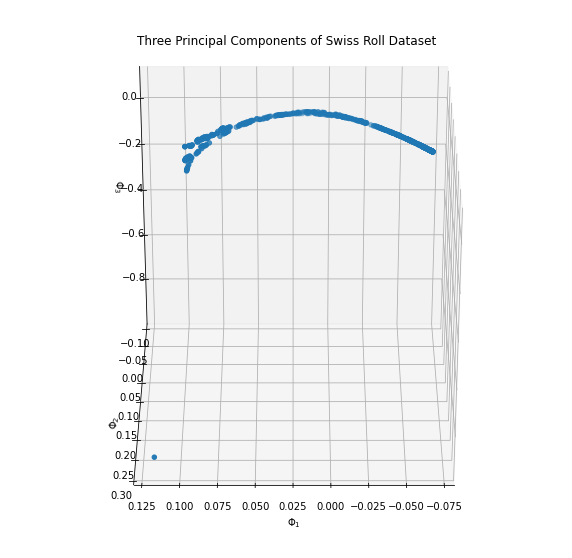

In [23]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenfunctions_1000[:,1].real, eigenfunctions_1000[:,2].real,eigenfunctions_1000[:,3].real)
ax.set_xlabel('$\u03A6_'+str(1)+'$')
ax.set_ylabel('$\u03A6_'+str(2)+'$')
ax.set_zlabel('$\u03A6_'+str(3)+'$')
ax.set_title('Three Principal Components of Swiss Roll Dataset')
ax.view_init(azim= 90, elev=30)

## Question 2 Bonus 2
Swiss Roll Dataset Diffusion Map by Datafold

In [3]:
import numpy as np
import copy

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

from sklearn.datasets import make_swiss_roll, make_s_curve
from sklearn.decomposition import PCA
import sklearn.manifold as manifold

import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.utils.plot import plot_pairwise_eigenvector
from datafold.dynfold import LocalRegressionSelection

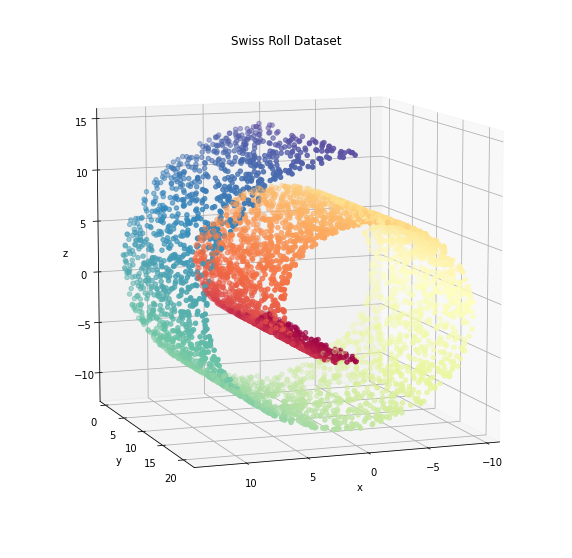

In [4]:
nr_samples = 5000

# reduce number of points for plotting
nr_samples_plot = 5000
idx_plot= np.random.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[idx_plot, 0], X[idx_plot, 1], X[idx_plot, 2], c=X_color[idx_plot], cmap=plt.cm.Spectral)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_title("Swiss Roll Dataset");
ax.view_init(10,70)

In [5]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters(result_scaling=0.5)

print(f'epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}')

epsilon=0.21737411493011954, cut-off=2.0010445205259533


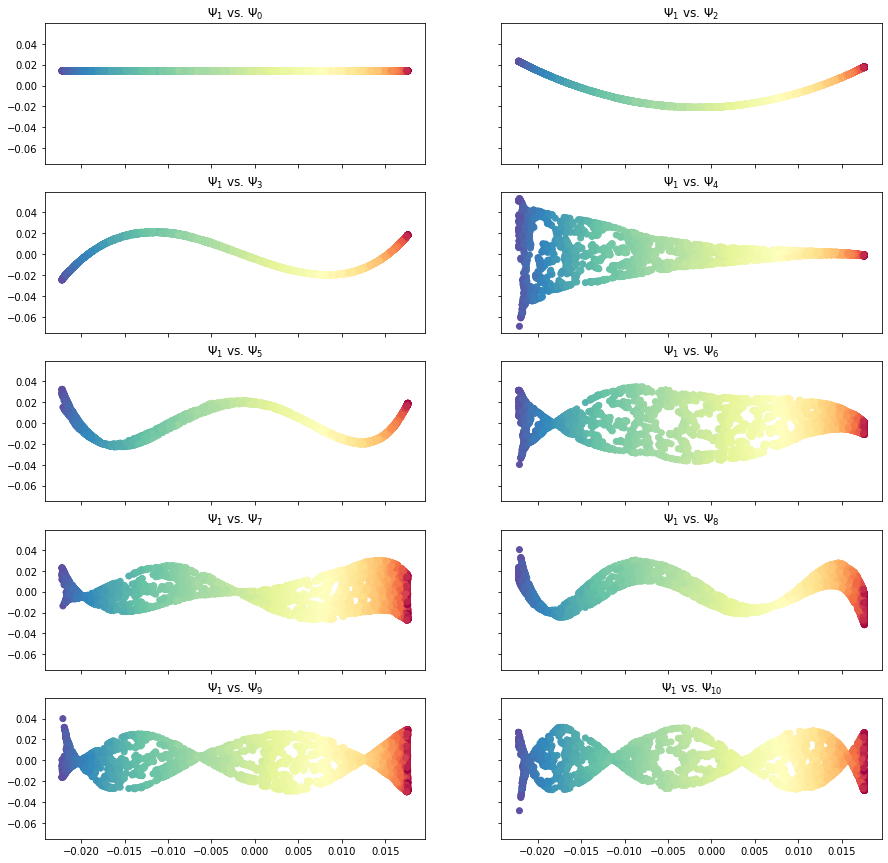

In [6]:
dmap = dfold.DiffusionMaps(kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon), n_eigenpairs=11, dist_kwargs=dict(cut_off=X_pcm.cut_off))
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(eigenvectors=dmap.eigenvectors_[idx_plot, :], n=1,
                          fig_params=dict(figsize=[15,15]),
                          scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]))

In [7]:
evals

array([1.        , 0.9999195 , 0.99966778, 0.99925319, 0.99873497,
       0.99870283, 0.99838632, 0.99812624, 0.99795073, 0.99776646,
       0.99716054])

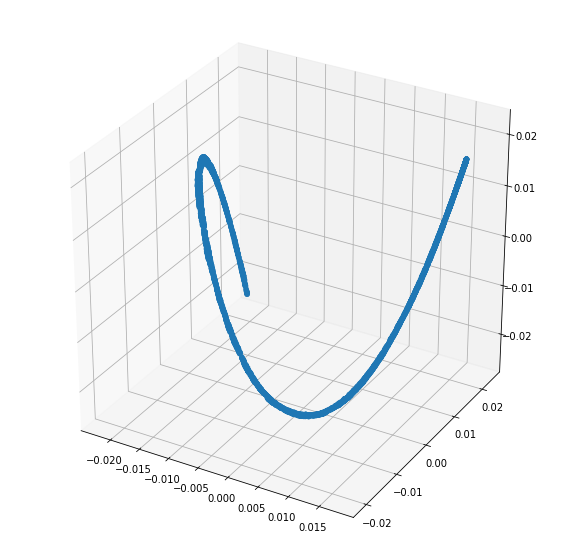

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(evecs[idx_plot,1], evecs[idx_plot,2], evecs[idx_plot,3,])
#ax.view_init(azim= 90, elev=30)

Datafold calculation with N = 1000 data points.

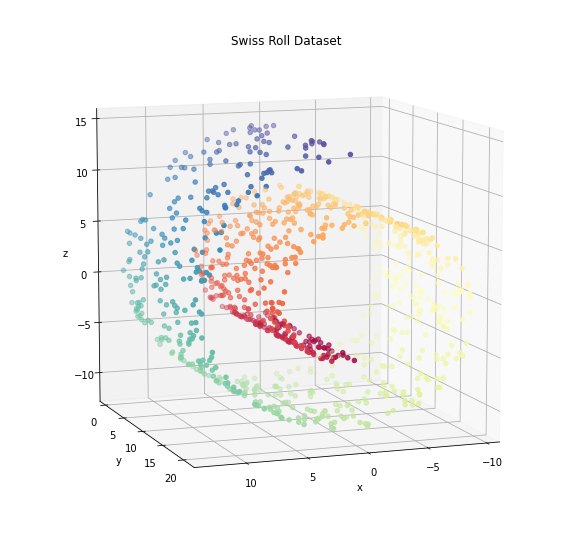

In [12]:
nr_samples2 = 1000

# reduce number of points for plotting
nr_samples_plot2 = 1000
idx_plot2= np.random.permutation(nr_samples2)[0:nr_samples_plot2]

# generate point cloud
X2, X_color2 = make_swiss_roll(nr_samples2, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X2[idx_plot2, 0], X2[idx_plot2, 1], X2[idx_plot2, 2], c=X_color2[idx_plot2], cmap=plt.cm.Spectral)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_title("Swiss Roll Dataset");
ax.view_init(10,70)

In [13]:
X_pcm2 = pfold.PCManifold(X2)
X_pcm2.optimize_parameters(result_scaling=0.5)

print(f'epsilon={X_pcm2.kernel.epsilon}, cut-off={X_pcm2.cut_off}')

epsilon=0.2079209601128376, cut-off=1.9570502359966735


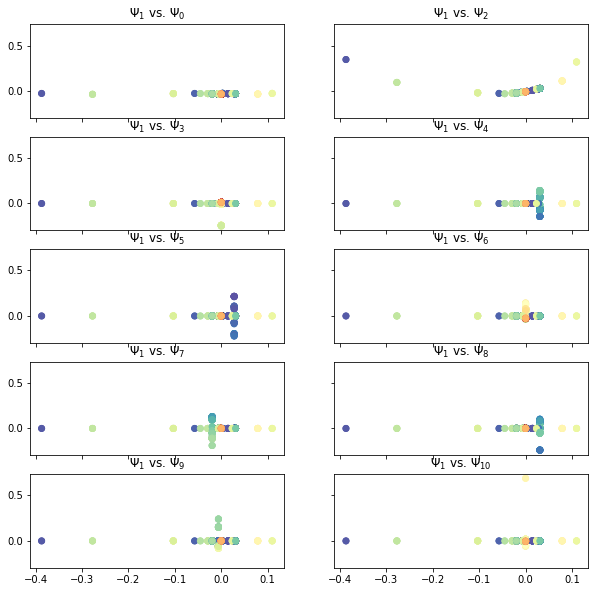

In [14]:
dmap2 = dfold.DiffusionMaps(kernel=pfold.GaussianKernel(epsilon=X_pcm2.kernel.epsilon), n_eigenpairs=11, dist_kwargs=dict(cut_off=X_pcm2.cut_off))
dmap2 = dmap2.fit(X_pcm2)
evecs2, evals2 = dmap2.eigenvectors_, dmap2.eigenvalues_

plot_pairwise_eigenvector(eigenvectors=dmap2.eigenvectors_[idx_plot2, :], n=1,
                          fig_params=dict(figsize=[10,10]),
                          scatter_params=dict(cmap=plt.cm.Spectral, c=X_color2[idx_plot2]))

## Question 2 Part 3
Diffusion Map Algorithm Calculation with data_DMAP_PCA_vadere.txt dataset. 

In [49]:
import pandas as pd

In [50]:
X_vadere = pd.read_csv("data_DMAP_PCA_vadere.txt", sep=" ", header=None).to_numpy()
X_vadere = X_vadere - X_vadere.mean()

In [51]:
lambda_v, phi_v = kernelnormalize(X_vadere, 3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


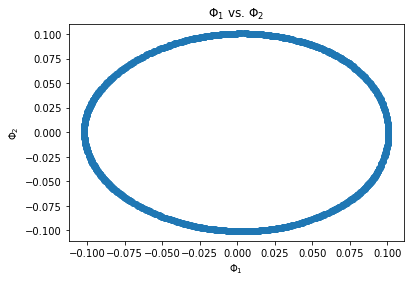

In [52]:
plt.scatter(phi_v[:,1], phi_v[:,2])
plt.xlabel('$\u03A6_'+str(1)+'$')
plt.ylabel('$\u03A6_'+str(2)+'$')
plt.title('$\u03A6_'+str(1)+'$ vs. $\u03A6_'+str(2)+'$')
plt.show()

In [53]:
lambda_v

array([1.        +0.j, 0.99992943+0.j, 0.99993104+0.j])

Diffusion Map Algorithm with 4 Eigenfunctions

In [54]:
lambda_v3, phi_v3 = kernelnormalize(X_vadere, 4)

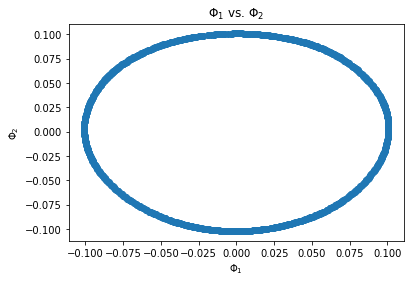

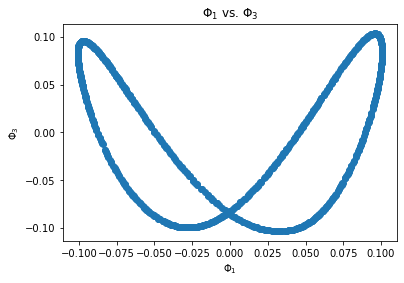

In [55]:
for i in range(2,4):
    plt.scatter(phi_v3[:,1], phi_v3[:,i])
    plt.xlabel('$\u03A6_'+str(1)+'$')
    plt.ylabel('$\u03A6_'+str(i)+'$')
    plt.title('$\u03A6_'+str(1)+'$ vs. $\u03A6_'+str(i)+'$')
    plt.show()

In [56]:
lambda_v3

array([1.        +0.j, 0.99993104+0.j, 0.99992943+0.j, 0.99972196+0.j])

Text(0.5, 0, '$Φ_3$')

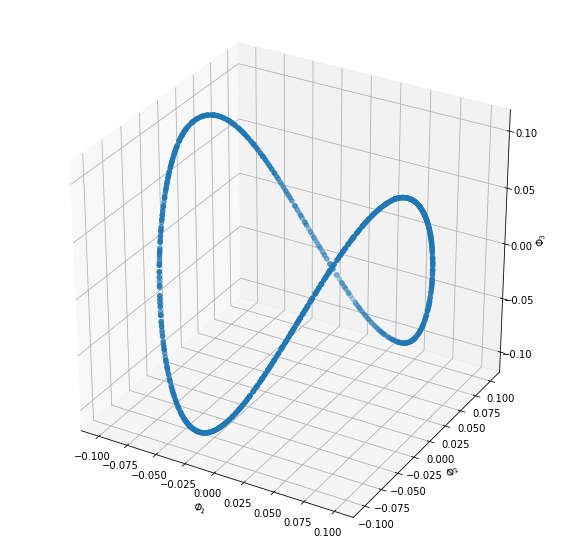

In [58]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(phi_v3[:,1].real, phi_v3[:,2].real, phi_v3[:,3].real)
ax.set_xlabel('$\u03A6_'+str(1)+'$')
ax.set_ylabel('$\u03A6_'+str(2)+'$')
ax.set_zlabel('$\u03A6_'+str(3)+'$')